<a href="https://colab.research.google.com/github/Chanminii/Bank-Marketing-prediction/blob/main/mlcw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BANK DATA ANALYSIS


In [30]:
# Import libraries

## basic
import pandas as pd
import numpy as np
import warnings
## visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] =(10,10)
sns.set_theme(style="darkgrid")

# **Loading data**

In [31]:
# Load the dataset

df= pd.read_csv('bank-full.csv', delimiter =';') #delimiter converts the data into a stuctured format
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


observation:  

*   Dataset consists of Numerical and Categorical data
*   17 Features can be seen
*   'y' is the output
*   duration column should be deleted since duration can be only known after the label column is known (avoid 'data leakage')






In [32]:
# Check the shape of the data
df.shape

(45211, 17)

observation:

*   There are 45211 rows and 17 columns




In [33]:
# Drop 'duration' column
df = df.drop('duration', axis=1)

print('Shape of dataset',df.shape)
df.head()

Shape of dataset (45211, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [34]:
df.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


# Histogram plot

<function matplotlib.pyplot.show(close=None, block=None)>

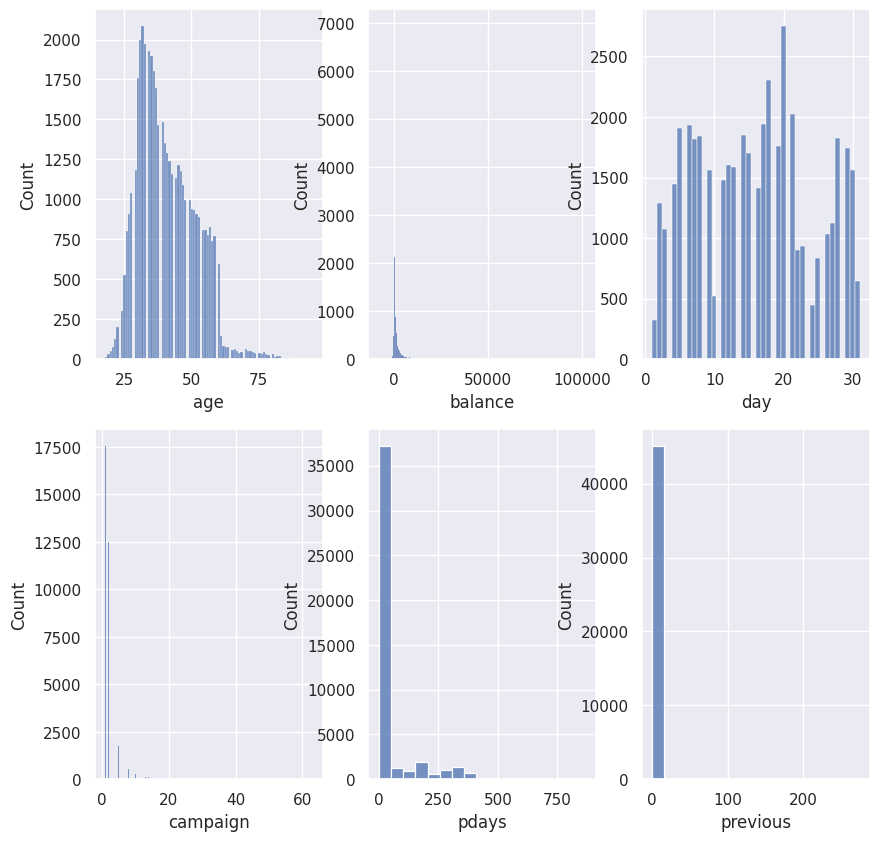

In [35]:
# plot histograms
fig, axes = plt.subplots(2,3)
sns.histplot(data=df, x='age', ax=axes[0,0])
sns.histplot(data=df, x='balance', ax=axes[0,1])
sns.histplot(data=df, x='day', ax=axes[0,2])
sns.histplot(data=df, x='campaign', ax=axes[1,0])
sns.histplot(data=df, x='pdays', ax=axes[1,1])
sns.histplot(data=df, x='previous', ax=axes[1,2])
plt.show


# Distribution plot

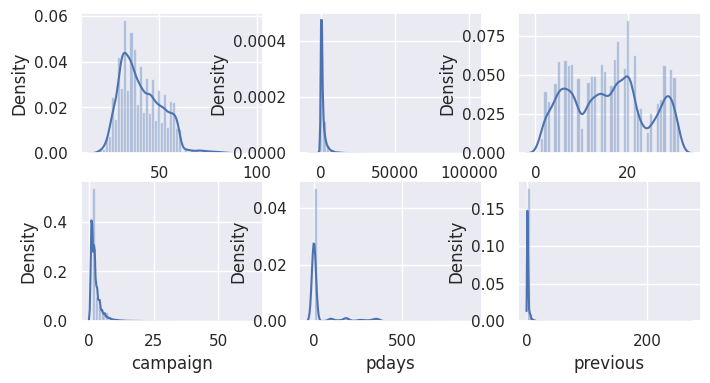

In [36]:
from pylab import *

# plot distribution plots
sns.set(rc={'figure.figsize': (8, 4)})
np.random.seed(0)

fig, axes = plt.subplots(2, 3)

subplot(2,3,1)
sns.distplot(df['age'])
subplot(2,3,2)
sns.distplot(df['balance'])
subplot(2,3,3)
sns.distplot(df['day'])
subplot(2,3,4)
sns.distplot(df['campaign'])
subplot(2,3,5)
sns.distplot(df['pdays'])
subplot(2,3,6)
sns.distplot(df['previous'])
plt.show()


# Box plot

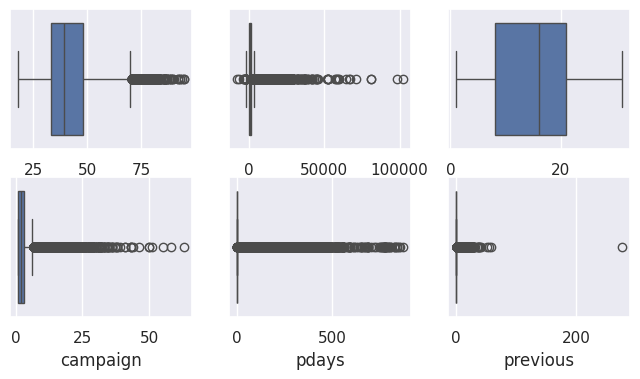

In [37]:
# plot boxplots
fig, axes = plt.subplots(2, 3)

sns.boxplot(data=df, x='age', ax=axes[0,0])
sns.boxplot(data=df, x='balance', ax=axes[0,1])
sns.boxplot(data=df, x='day', ax=axes[0,2])
sns.boxplot(data=df, x='campaign', ax=axes[1,0])
sns.boxplot(data=df, x='pdays', ax=axes[1,1])
sns.boxplot(data=df, x='previous', ax=axes[1,2])
plt.show()


# Class Distribution

y
no     39922
yes     5289
Name: count, dtype: int64


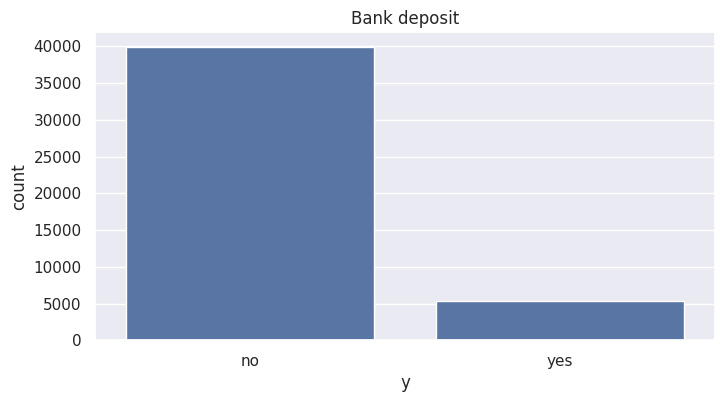

In [25]:
print(df.y.value_counts())
axes1 = sns.countplot(data=df, x='y')
plt.title("Bank deposit")
plt.show()

Observations:


*    subscribed by 5289 out of 45211
*   not subscribed by 39922 out of 45211

*   dataset has imbalanced data






In [38]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

observation:

*   There are 16 features
*   which are : age , job , marital, education, default, balance, housing, loan, contact, day, month, campaign, pdays, previous, poutcome, y



In [39]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


Observation:


*   Numerical data: age, balance, day, campaign, pdays, previous
*   Categorical data: job, marital, education, default, housing, loan, contact, month, poutcome, y



# Checking Missing Values

In [43]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Observations:


*   No missing values in the given datset




# Correlation Plot (Heatmap)

,age,balance,day,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000


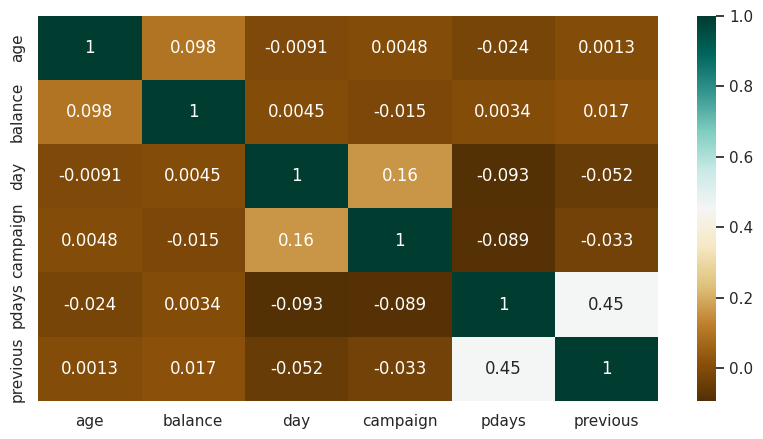

In [47]:
#plot heatmap
plt.figure(figsize=(10,5))
numerical_df = df.select_dtypes(include=np.number)
c= numerical_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [49]:
#Standerdization of the datset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age','balance','day','campaign','pdays','previous']
numerical_df[num_cols] = scaler.fit_transform(numerical_df[num_cols])

#numerical_df = numerical_df.drop('y', axis=1)
numerical_df.head()

,age,balance,day,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.569351,-0.411453,-0.25194


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['balance'].plot(kind='hist', bins=20, title='balance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='age', y='balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['day']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('day')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['day']
  ys = series['balance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('day')
_ = plt.ylabel('balance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['day']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'day'}, axis=1)
              .sort_values('day', ascending=True))
  xs = counted['day']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('day')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['campaign']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('campaign', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('campaign')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_7['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['balance'].plot(kind='line', figsize=(8, 4), title='balance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [55]:
#Encode categorical Features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
df_targ = df['y']

df_targ = df_targ.apply(lambda x: 1 if x=='yes' else 0)
df_targ.head(15)

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [60]:
# Encode categorical features
#Onehot encoder method is used to encode categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

catg_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']

df_catg = df.copy()
df_catg.head()

#Encode categorical Data to Numerical
encoded_df = pd.DataFrame(encoder.fit_transform(df_catg[catg_cols]))
encoded_df.columns = encoder.get_feature_names_out(catg_cols)

#Replace Categorical Data with Encoded Data
df_catg = df_catg.drop(catg_cols, axis=1)
df_catg = pd.concat([df_catg, encoded_df], axis=1)

print('Shape of the dataframe:', df_catg.shape)
df_catg.head()

Shape of the dataframe: (45211, 51)


,age,balance,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,1,-1,0,no,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,1,-1,0,no,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,1,-1,0,no,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,1,-1,0,no,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,1,-1,0,no,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Split Dataset for Training and Testing

In [62]:
# Select features
feature = df_catg.drop('y', axis=1)

# Select target
target = df_catg['y']

#Set training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle = True, test_size=0.2, random_state=1)

#Show training and testing data
print('Shape of Training Features:', X_train.shape)
print('Shape of Testing Features:', X_test.shape)
print('Shape of Training Target:', y_train.shape)
print('Shape of Testing Target:', y_test.shape)

Shape of Training Features: (36168, 50)
Shape of Testing Features: (9043, 50)
Shape of Training Target: (36168,)
Shape of Testing Target: (9043,)


# Modelling

In [66]:
# function to evaluate and calculate accuracy , precision , recall, F1- score and kappa score
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(X_test)

    # Convert y_test and y_pred to numerical labels if they are strings
    if isinstance(y_test.iloc[0], str):  # Check if y_test contains strings
        y_test = y_test.map({'no': 0, 'yes': 1})  # Map 'no' to 0 and 'yes' to 1
    if isinstance(y_pred[0], str):
        y_pred = pd.Series(y_pred).map({'no': 0, 'yes': 1}).values  # Map 'no' to 0 and 'yes' to 1


    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate the area under the curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    # Visualization of Confusion matrix
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return {'acc': acc, 'pre': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'fpr':fpr, 'tpr': tpr, 'auc': auc, 'cm' : cm }


# Random Forest

In [67]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Building a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

RandomForestClassifier(random_state=0)

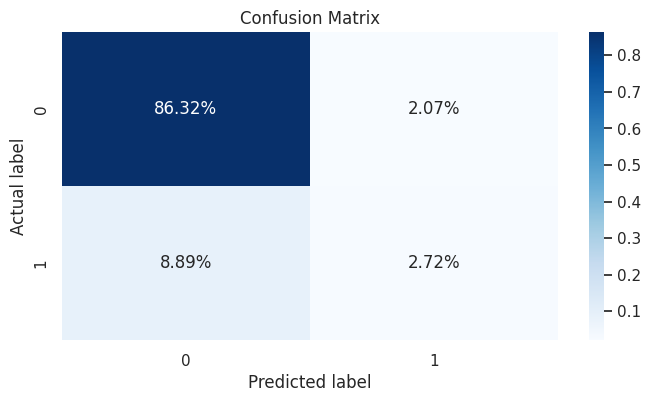

Accuracy: 0.8904124737365918
Precision: 0.5681293302540416
Recall: 0.2342857142857143
F1-score: 0.3317599460552933
Kappa score: 0.28315520360047286
Area Under Curve: 0.782152359505043
Confusion Matrix:
 [[7806  187]
 [ 804  246]]


In [68]:
# Evaluate Random Forest Model
rf_eval = evaluate_model(rf_model, X_test, y_test)
rf_eval

# print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['pre'])
print('Recall:', rf_eval['rec'])
print('F1-score:', rf_eval['f1'])
print('Kappa score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])